In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points


### simple model for the data

In [14]:
truths_S = [10.5, 1.9, 0.2, 0, 0, 0]

plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

plot_range = [[9.8,11.2], [0,4.2], [0,2.2], [-2,2], [-3,2], [-2,2]]

ndim_short = 3

In [20]:
ms_A = jsm_mcmc.single_chain("../../../data/model_runs_a23/mock_A/model_A/chain.h5", Nstack=500, Nburn=200, Nthin=25, labels=plabels)

ms_B = jsm_mcmc.single_chain("../../../data/model_runs_a23/mock_A/model_B/chain.h5", Nstack=500, Nburn=200, Nthin=25, labels=plabels)

ms_C = jsm_mcmc.single_chain("../../../data/model_runs_a23/mock_A/model_C/chain.h5", Nstack=500, Nburn=200, Nthin=25, labels=plabels)

ms_D = jsm_mcmc.single_chain("../../../data/model_runs_a23/mock_A/model_D/chain.h5", Nstack=500, Nburn=200, Nthin=25, labels=plabels)

In [21]:
mlabels = ["model_A", "model_B", "model_C", "model_D"]

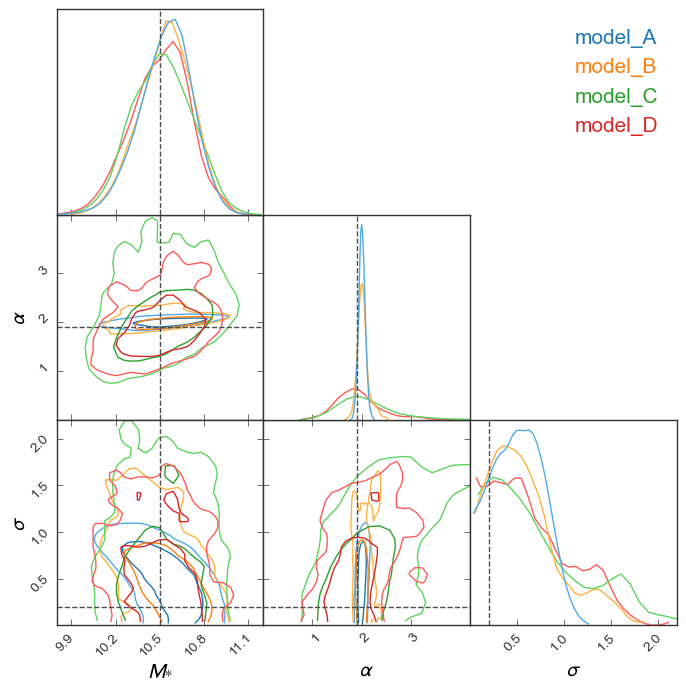

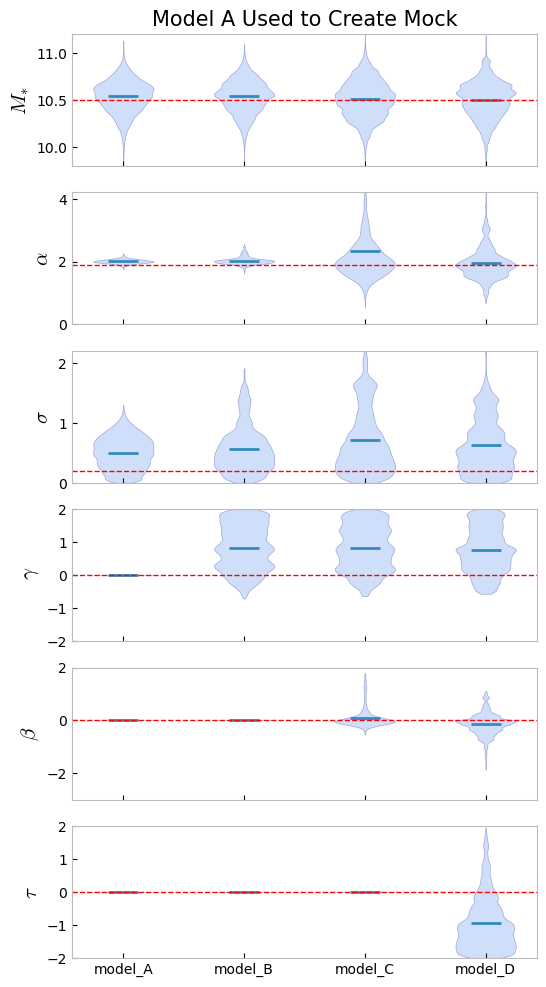

In [22]:
analysis = jsm_mcmc.multi_chain(np.array([ms_A.end, ms_B.end, ms_C.end, ms_D.end]), ndim_short, truths_S, plot_range, plabels, mlabels, nsigma=2, fill=False, smooth=1, title="Model A Used to Create Mock")

analysis.trim()

analysis.plot_posteriors()

analysis.violin(6)

In [8]:
mlabels = ["model_A", "model_D"]

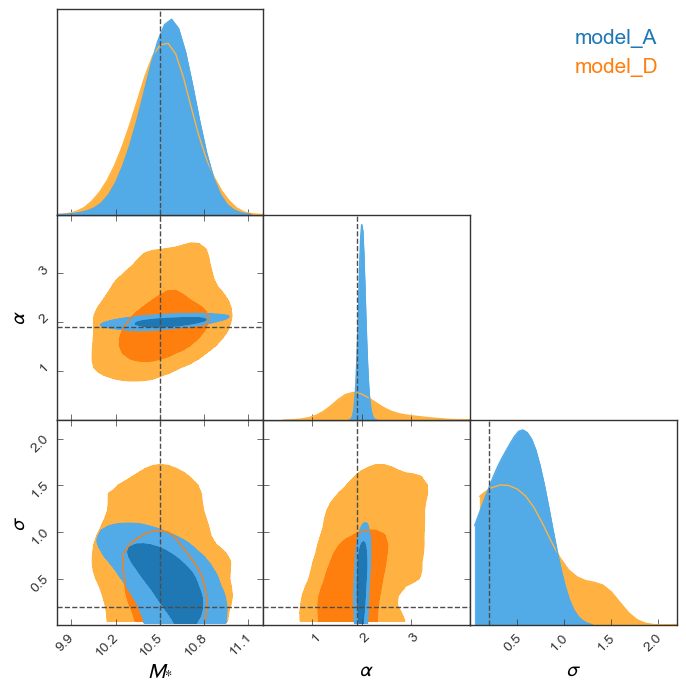

In [9]:
analysis = jsm_mcmc.multi_chain(np.array([ms_A.end, ms_D.end]), 3, truths_S, plot_range, plabels, mlabels, nsigma=2, fill=True, smooth=1.3)
analysis.trim()
analysis.plot_posteriors()